# J Spectro

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization function
def plot_ols(X, y, model, title):
    y_pred = model.predict(X)
    residuals = y - y_pred

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.scatter(y, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{title} - Actual vs Predicted")

    plt.subplot(2, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f"{title} - Residuals vs Predicted")

    plt.subplot(2, 2, 3)
    sns.histplot(residuals, kde=True)
    plt.title(f"{title} - Residuals Histogram")

    plt.subplot(2, 2, 4)
    sm.qqplot(residuals, line='45', ax=plt.gca())
    plt.title(f"{title} - QQ Plot")

    plt.tight_layout()
    plt.show()

# Load data
data = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv")  # Replace with your file path
numeric_data = data.select_dtypes(include='number').copy()
numeric_data.dropna(inplace=True)


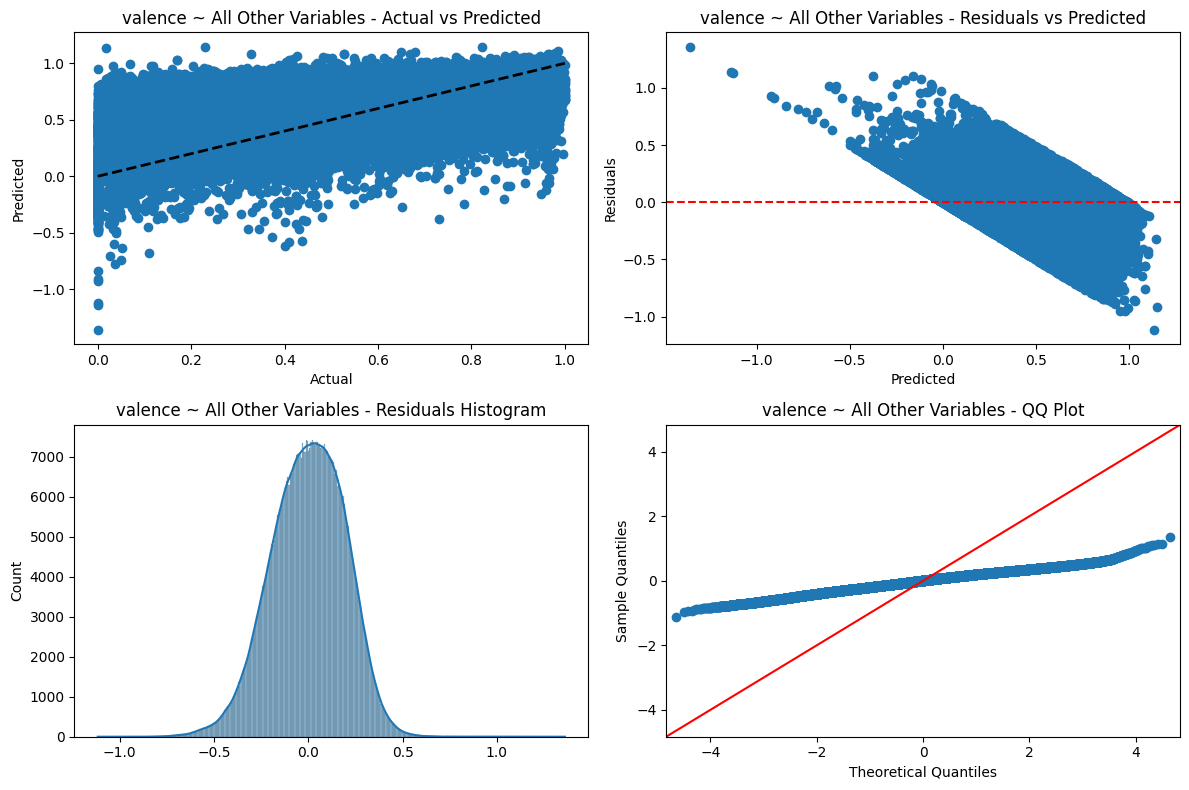

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 3.184e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:43:51   Log-Likelihood:             1.2891e+05
No. Observations:              586672   AIC:                        -2.578e+05
Df Residuals:                  586657   BIC:                        -2.576e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3353      0.003  

In [2]:
target = 'valence'
X = numeric_data.drop(columns=[target])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Other Variables")
print(model.summary())


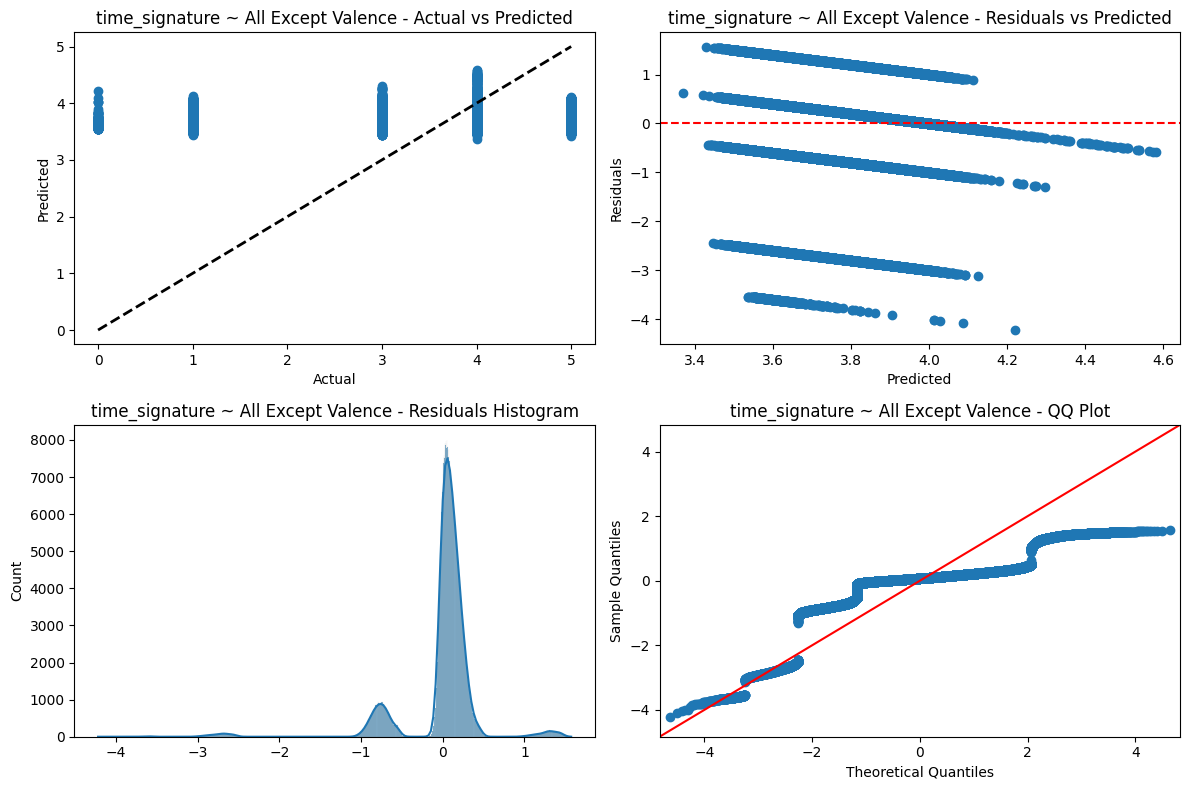

                            OLS Regression Results                            
Dep. Variable:         time_signature   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3193.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:44:10   Log-Likelihood:            -3.7338e+05
No. Observations:              586672   AIC:                         7.468e+05
Df Residuals:                  586658   BIC:                         7.469e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5742      0.006  

In [3]:
target = 'time_signature'
X = numeric_data.drop(columns=[target, 'valence'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence")
print(model.summary())


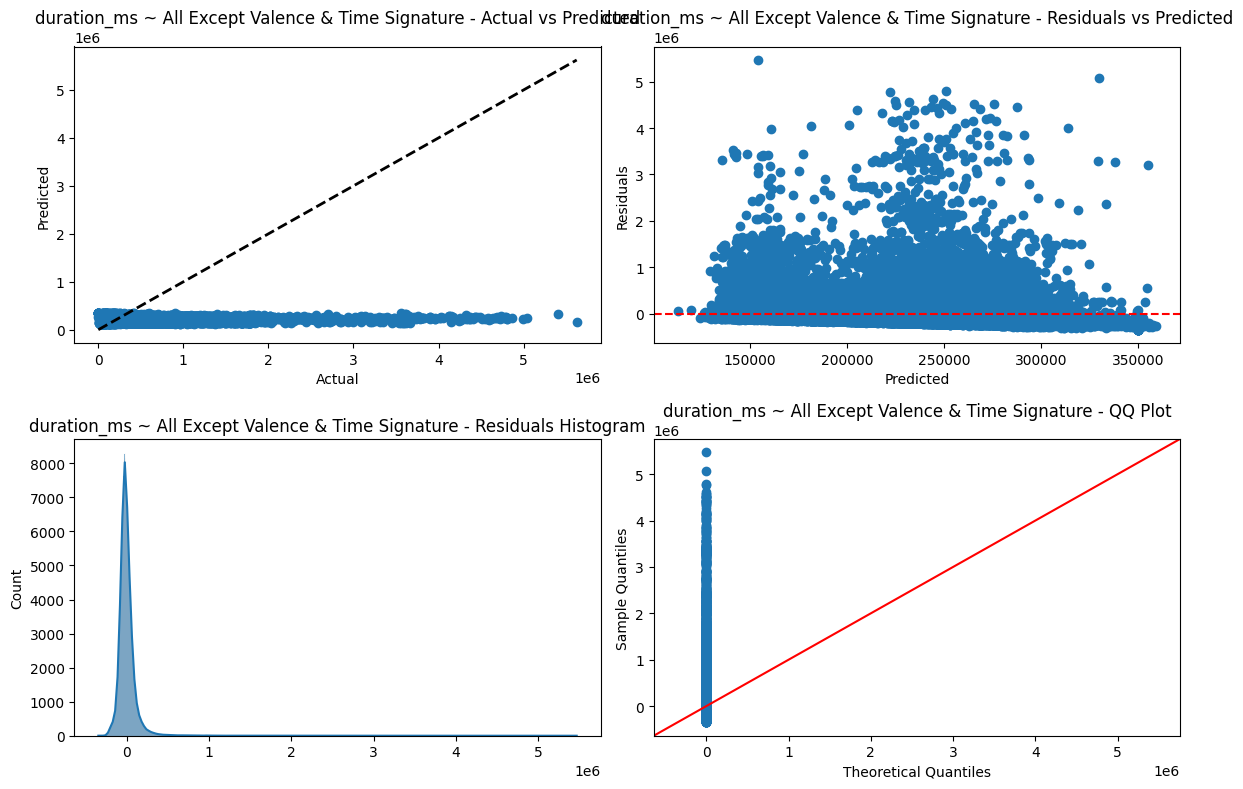

                            OLS Regression Results                            
Dep. Variable:            duration_ms   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1937.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:44:24   Log-Likelihood:            -7.7134e+06
No. Observations:              586672   AIC:                         1.543e+07
Df Residuals:                  586659   BIC:                         1.543e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.033e+05   1690.028  

In [4]:
target = 'duration_ms'
X = numeric_data.drop(columns=[target, 'valence', 'time_signature'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence & Time Signature")
print(model.summary())


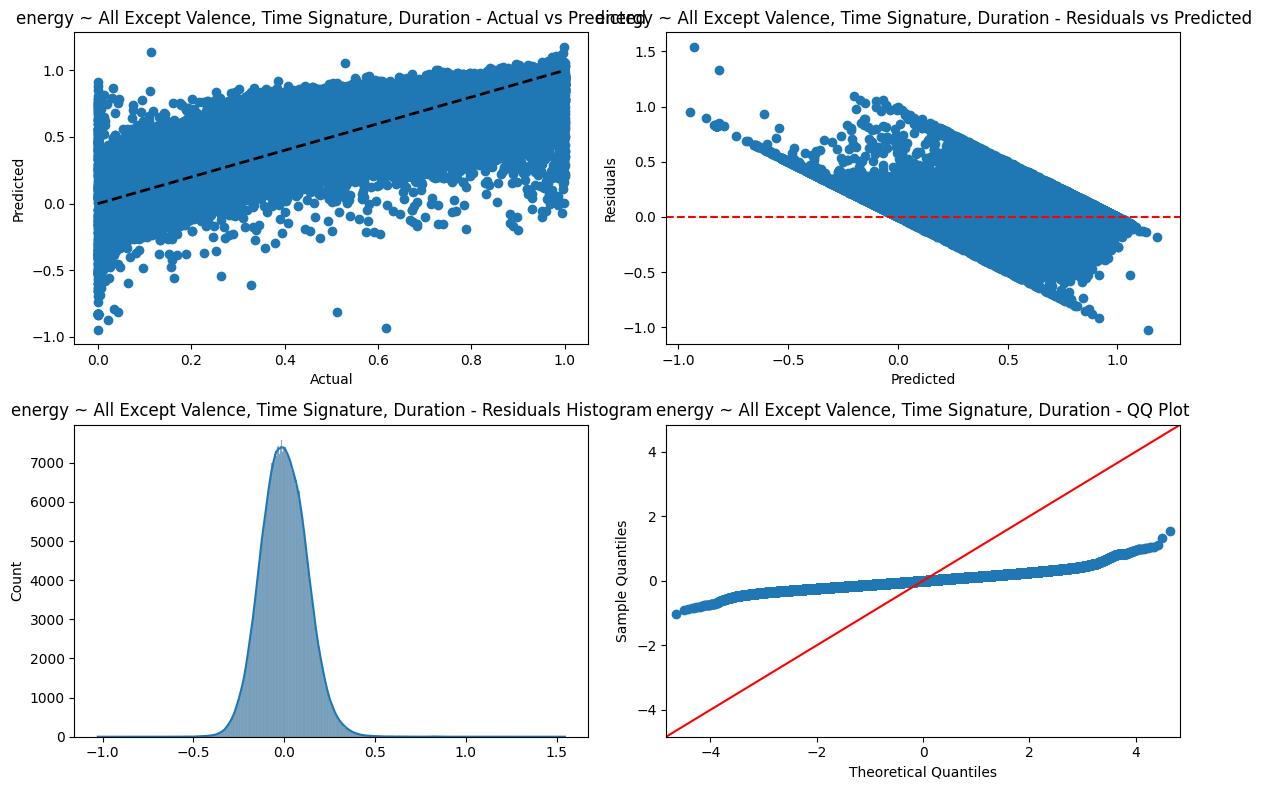

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                 1.584e+05
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:44:37   Log-Likelihood:             3.8081e+05
No. Observations:              586672   AIC:                        -7.616e+05
Df Residuals:                  586660   BIC:                        -7.615e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8672      0.001  

In [5]:
target = 'energy'
X = numeric_data.drop(columns=[target, 'valence', 'time_signature', 'duration_ms'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence, Time Signature, Duration")
print(model.summary())


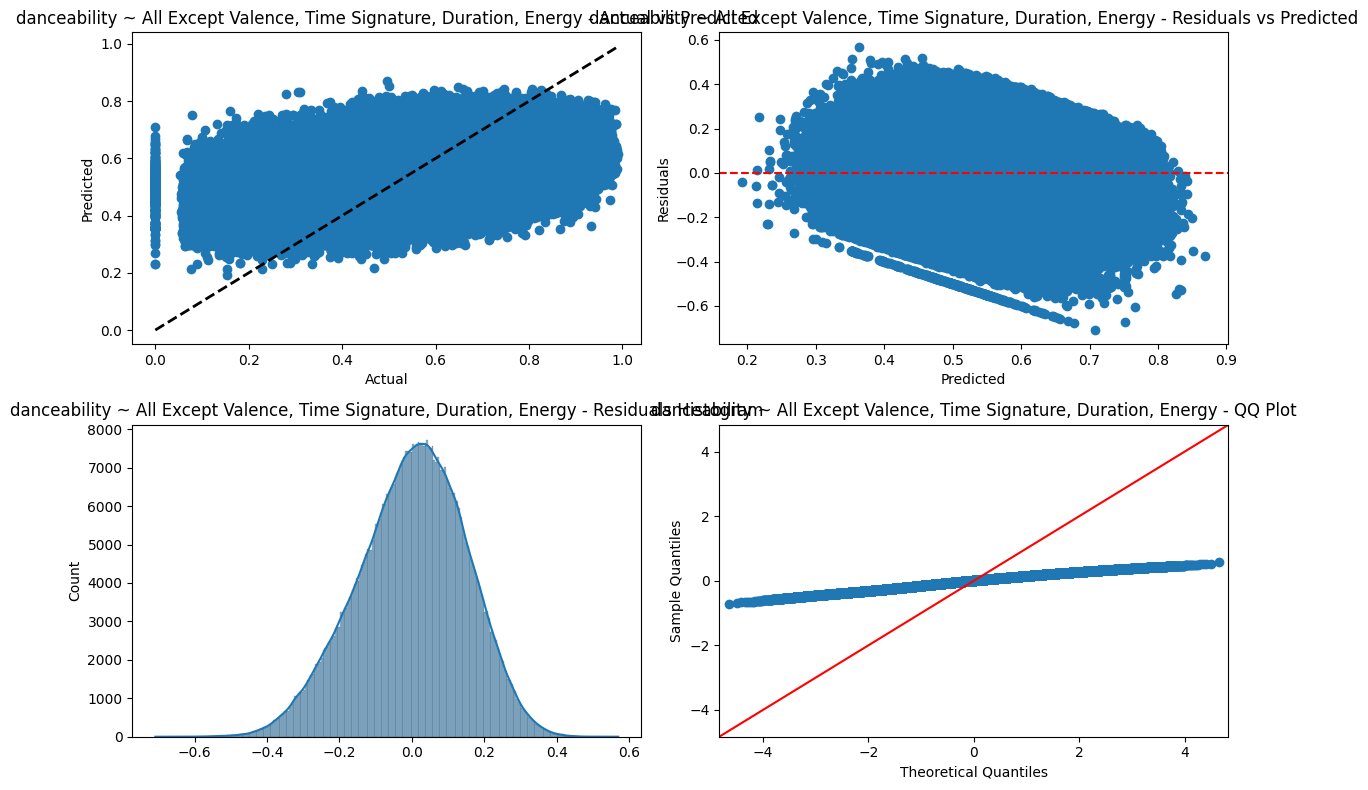

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                 1.410e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:44:48   Log-Likelihood:             2.8391e+05
No. Observations:              586672   AIC:                        -5.678e+05
Df Residuals:                  586661   BIC:                        -5.677e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7194      0.001  

In [6]:
target = 'danceability'
X = numeric_data.drop(columns=[target, 'valence', 'time_signature', 'duration_ms', 'energy'])
y = numeric_data[target]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
plot_ols(X, y, model, f"{target} ~ All Except Valence, Time Signature, Duration, Energy")
print(model.summary())

In [7]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')  # Replace with your actual dataset path

# Define the target variable (popularity) and the predictor variables
X = df[['danceability', 'explicit', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']]  # Predictor variables
y = df['popularity']  # Target variable

# Add a constant to the predictor variables (for the intercept term)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                 1.517e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:44:55   Log-Likelihood:            -2.4726e+06
No. Observations:              586672   AIC:                         4.945e+06
Df Residuals:                  586661   BIC:                         4.945e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.5226      0.161  

In [8]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')  # Replace with your actual dataset path

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Show the correlation of all variables with 'popularity'
if 'popularity' in numeric_df.columns:
    print(correlation_matrix['popularity'])


                  popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000     0.027681  0.211758      0.187000  0.302315   
duration_ms         0.027681     1.000000 -0.016747     -0.120371  0.024825   
explicit            0.211758    -0.016747  1.000000      0.150229  0.123076   
danceability        0.187000    -0.120371  0.150229      1.000000  0.241563   
energy              0.302315     0.024825  0.123076      0.241563  1.000000   
key                 0.015299     0.004626  0.010932      0.018824  0.036294   
loudness            0.327028     0.000337  0.134603      0.251436  0.764735   
mode               -0.033655    -0.027610 -0.051754     -0.044719 -0.065246   
speechiness        -0.047357    -0.125771  0.102258      0.199310 -0.053506   
acousticness       -0.370882    -0.064434 -0.149018     -0.242951 -0.715412   
instrumentalness   -0.236487     0.069278 -0.067520     -0.225900 -0.195839   
liveness           -0.048740     0.002137 -0.013114 

In [9]:
import statsmodels.api as sm

# Define the target variable (popularity) and the predictor variables
X = df[['danceability', 'explicit', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']]  # Predictor variables
y = df['popularity']  # Target variable

# Add a constant to the predictor variables (for the intercept term)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                 1.517e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:45:07   Log-Likelihood:            -2.4726e+06
No. Observations:              586672   AIC:                         4.945e+06
Df Residuals:                  586661   BIC:                         4.945e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.5226      0.161  

In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')  # Replace with your actual dataset path

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation between 'popularity' and the selected variables
correlation_with_popularity = numeric_df[['popularity', 'loudness', 'acousticness', 'energy', 'danceability', 'explicit']].corr()

# Display the correlation values of the selected variables with 'popularity'
print(correlation_with_popularity['popularity'])

popularity      1.000000
loudness        0.327028
acousticness   -0.370882
energy          0.302315
danceability    0.187000
explicit        0.211758
Name: popularity, dtype: float64


# The Different Variation in Popular (POP) Music

Loudness: Refers to the overall volume or amplitude of the audio in a track. It typically indicates how loud or soft the song sounds. Higher values indicate a louder track, while lower values suggest a quieter one.

Acoustics: This relates to the qualities of the sound in a recording, such as how natural, clean, or spacious the music feels. It can be influenced by things like the use of reverb, the presence of background noise, or the clarity of the recording.

Energy: Represents the intensity and activity level of a song. High energy tracks often have fast tempos, loud volumes, and intense instruments, while lower energy songs tend to be more relaxed, slower, and quieter.

Danceability: Measures how suitable a song is for dancing, considering rhythm, tempo, beat consistency, and overall groove. A higher danceability score typically means the song has a rhythm that encourages movement, while lower scores suggest it might not be as rhythmic or suitable for dancing.

Explicitness: Indicates whether a song contains explicit content, such as strong language or adult themes. A higher value suggests that the song may include profane language or other mature content, while lower values suggest a more family-friendly track.

/tmp/ipykernel_1652/868046846.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_popularity.index[1:], y=correlation_with_popularity['popularity'][1:], palette='viridis')


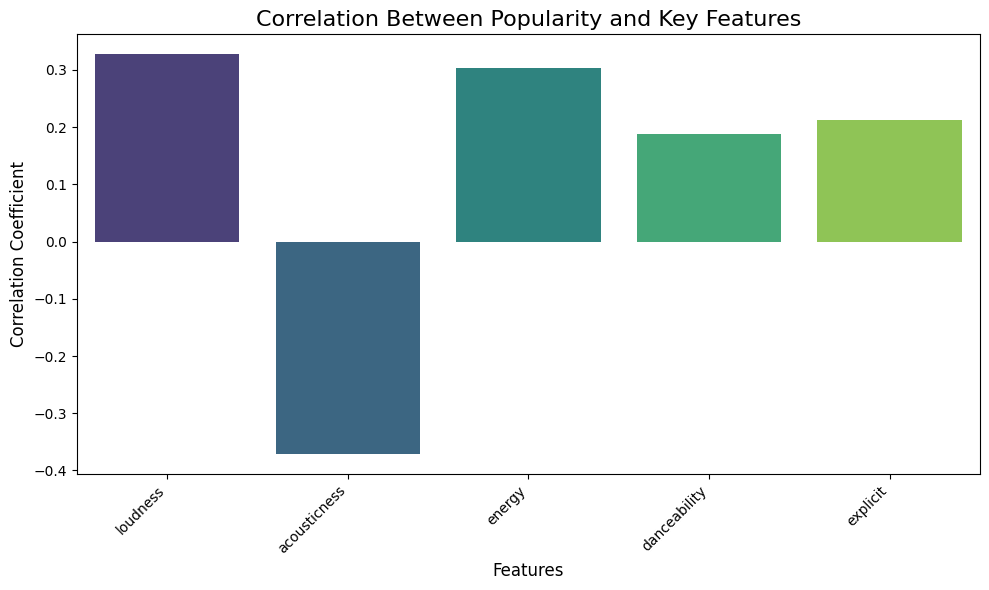

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')  # Replace with your actual dataset path

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation between 'popularity' and the selected variables
correlation_with_popularity = numeric_df[['popularity', 'loudness', 'acousticness', 'energy', 'danceability', 'explicit']].corr()

# Create a bar plot for the correlation values with popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_popularity.index[1:], y=correlation_with_popularity['popularity'][1:], palette='viridis')

# Customize the graph
plt.title('Correlation Between Popularity and Key Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()